
# OmarAbu Rizk
# CODE CLAUSE GENERAL PROJECT-1
# Churn Prediction in Telecom Industry using Logistic Regression


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Dataset

In [7]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**There is no missing value in dataset**

In [ ]:
%matplotlib inline

<BarContainer object of 7043 artists>

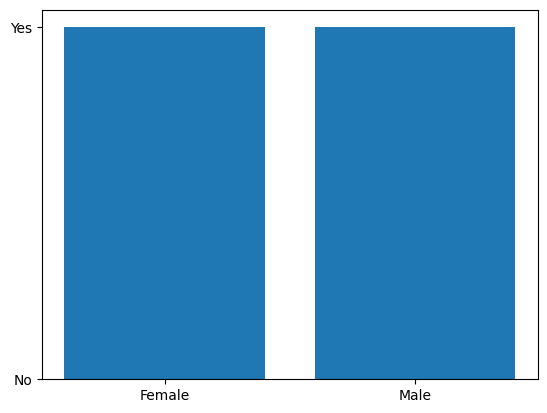

In [13]:
plt.bar(data['gender'],data['Churn'])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

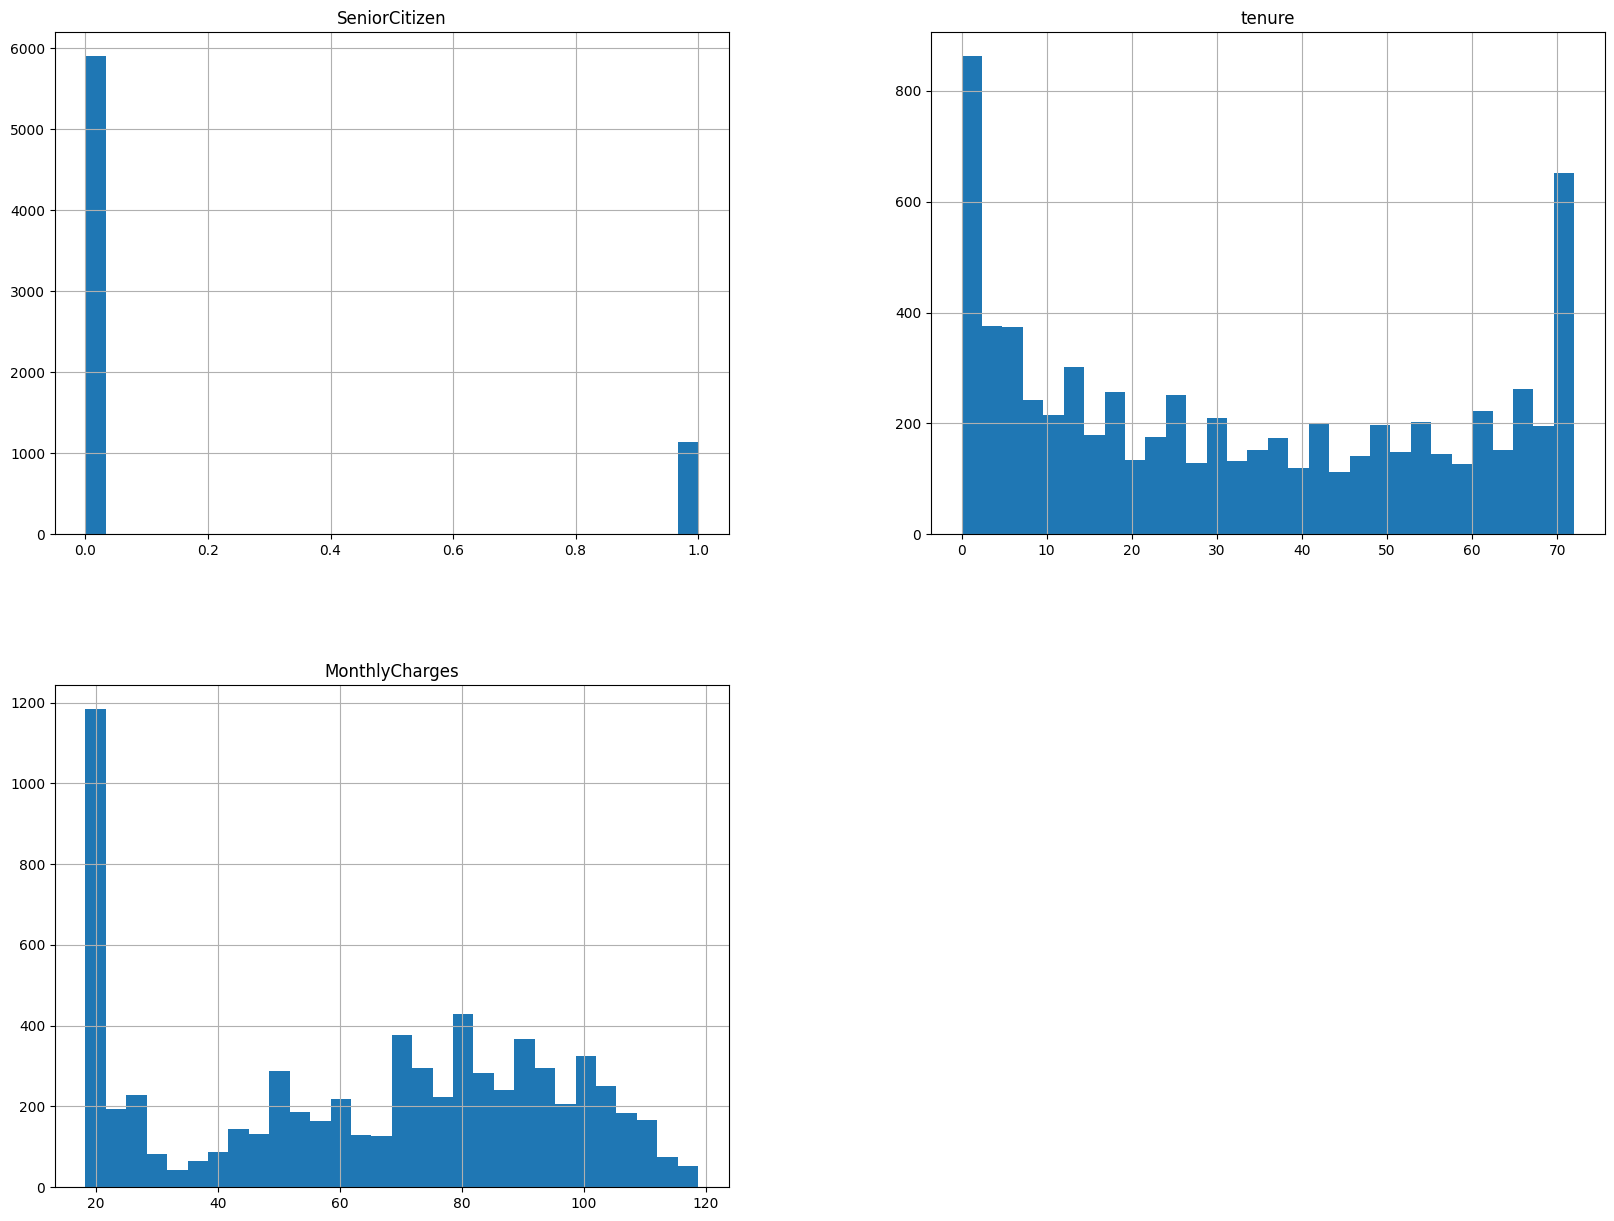

In [14]:
data.hist(bins = 30, figsize=(20,15))

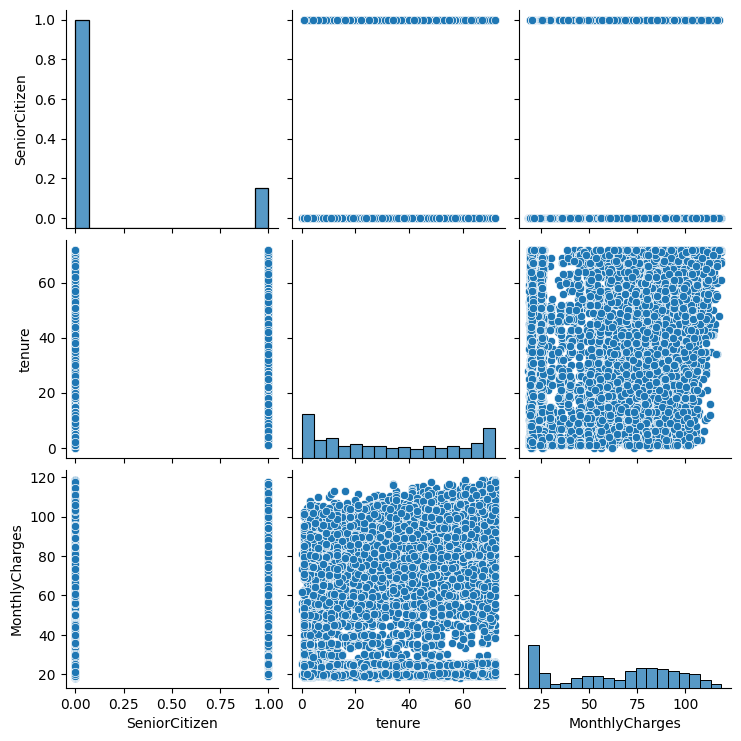

In [15]:
sns.pairplot(data)

## Cleaning Data

In [16]:
col = ['gender','customerID','tenure']
data.drop(col,axis = 1,inplace=True)

In [19]:
data.head(4)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


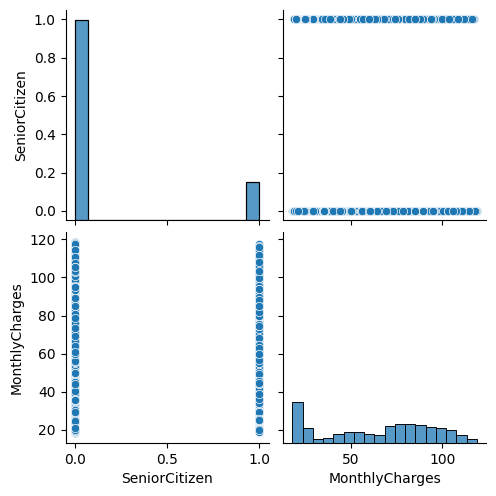

In [20]:
sns.pairplot(data)

In [22]:
data['TotalCharges'].isnull().sum()

0

In [25]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [26]:
data['TotalCharges'].describe()
#the datatype of the TotalCharges is Object so we will changec that

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [27]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data = data.dropna(how = "any", axis = 0)

In [28]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [30]:
data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##  EDA(Exploratory Data Analysis)

In [31]:
data['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

In [32]:
#converting Yes as 1 and No as 0
data["Churn"] = data["Churn"].replace(['Yes','No'],[1,0])

<ipython-input-32-f7d12a0666de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Churn"] = data["Churn"].replace(['Yes','No'],[1,0])


In [33]:
data.head(5)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [34]:
data_dummies = pd.get_dummies(data)

In [35]:
data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,103.20,7362.90,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,29.60,346.45,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,74.40,306.60,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [39]:
x = data_dummies.drop('Churn',axis = 1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [40]:
y = data_dummies['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [41]:
x.shape

(7032, 42)

In [42]:
y.shape

(7032,)

In [43]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### Variable Imbalancing

have Imbalance data using SMOTE for Imbalanced Classification

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=0)

In [46]:
x_smote, y_smote = smote.fit_resample(x,y)


In [50]:
y_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [48]:
y_smote.isnull().sum()

0

In [55]:
x_smote.isnull().sum()

SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProt

# Building Model

In [73]:
from sklearn.linear_model import LogisticRegression

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
my_model = LogisticRegression(solver='lbfgs', max_iter=400)

In [98]:
my_model.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [99]:
y_pred = my_model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [101]:
accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


In [102]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.7853589196872779
Precision: 0.724655218043344
Recall: 0.6977483680262566
F1 score: 0.7083477473025286


In [103]:
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [104]:
my_model.fit(x_smote_train,y_smote_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

In [105]:
y_smote_pred = my_model.predict(x_smote_test)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [107]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_smote_test, y_smote_pred)
precision = precision_score(y_smote_test, y_smote_pred, average='macro')
recall = recall_score(y_smote_test, y_smote_pred, average='macro')
f1 = f1_score(y_smote_test, y_smote_pred, average='macro')

In [108]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.834946757018393
Precision: 0.835795591242632
Recall: 0.8348486935757911
F1 score: 0.8348120402121986
